<a href="https://colab.research.google.com/github/nanangyudi/2020pds_d/blob/main/(Revisi)TugasBesar_Miftachul_Bachruddin_205150409111024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 >**Deskripsi Tujuan Bisnis**


1. User akan mengetahui IPK tiap semester
2. Mengetahui IPK paling tinggi dan terrendah tiap semester.
3. Dapat mengetahui banyak kelulusan tepat waktu.


> **Pengumpulan Data**

Pada tahapan pengumpulan data kita menggunakan dataset yang diambil dari internet berikut data informaasi lengkapnya:
*   Situs  : kaggle.com 
*   Judul  : On Time Graduation Classification, A GPA dataset gathered from a private university in Indonesia
*   Author : Oddy Virgantara Putra
*   url    : https://www.kaggle.com/oddyvirgantara/on-time-graduation-classification




> **Analisa Pendekatan**
1.   dalam analisi data ini kita menggunakan metode Exploratory Data Analysis (EDA)
2.   Dalam statistik, analisis data eksplorasi adalah pendekatan untuk menganalisis set data untuk merangkum karakteristik utama mereka.



> **Pemahaman Data**

Dalam dataset ini berisikan mengenai data terkait IPK yang dikumpulkan dari sebuah universitas di Indonesia. Dalam data ini berisi kolom yang menyediakan ip1,ip2,ip3,ip4 dan tepat. sehingga kita bisa melakukan analisa data.




> **Eksplorasi Data**

- **Mempersiapkan Data**

dengan cara import library yang dibutuhkan


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

- **Memasukkan Dataset**

Kita melakukan Import data berupa "CSV" yang ada di Github

In [ ]:
url = 'https://raw.githubusercontent.com/Mifta-ux/Tugas-Pengantar-Data-Saintis/main/data_lulus_tepat_waktu.csv'
df = pd.read_csv("https://raw.githubusercontent.com/Mifta-ux/Tugas-Pengantar-Data-Saintis/main/data_lulus_tepat_waktu.csv") 
df.head()

,ip1,ip2,ip3,ip4,tepat
0,2.30,1.97,1.80,1.56,Tidak
1,1.81,1.68,1.57,1.86,Tidak
2,3.07,3.00,2.75,3.21,Tidak
3,2.71,2.33,2.61,1.98,Tidak
4,3.17,3.02,3.28,2.96,Tidak


- **Preprocessing Data**

Kita dapat melihat bahwa tidak semua nilai fitur bertipe sama. Beberapa dari data adalah angka dan beberapa dari mereka tidak. Untuk mempermudah perhitungan, kita akan mengumpankan semua data numerik ke model. Kita lihat tipe data dari berbagai fitur yang dimiliki:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ip1     1687 non-null   float64
 1   ip2     1687 non-null   float64
 2   ip3     1687 non-null   float64
 3   ip4     1687 non-null   float64
 4   tepat   1687 non-null   object 
dtypes: float64(4), object(1)
memory usage: 66.0+ KB


Dapat dilihat bersadarkan output di atas, kolom yang digunakan ip1,ip2,ip3,ip4 sudah bersifat numerik

- **Melihat Dimensi Data**

dengan melihat dimensi data kita bisa melihat jumlah baris dan kolom dari data kita

In [ ]:
dimensi      = df.shape
panjang_data = len(df)
print(f'Dimensi data adalah {dimensi[0]} baris, dan {dimensi[1]} kolom')
print(f'Panjang data adalah {panjang_data} baris')

Dimensi data adalah 1687 baris, dan 5 kolom
Panjang data adalah 1687 baris


- **Melihat jumlah Lulus tepat waktu**

In [ ]:
df.tepat.value_counts()

Ya       1552
Tidak     135
Name: tepat, dtype: int64


> **Pemodelan Data**

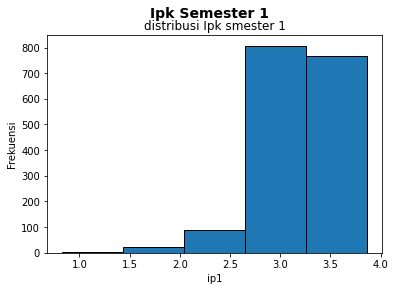

In [ ]:
plt.hist(df['ip1'], bins = 5, edgecolor = 'black')
plt.suptitle('Ipk Semester 1', fontsize=14, fontweight='bold')
plt.title('distribusi Ipk smester 1')
plt.xlabel('ip1')
plt.ylabel('Frekuensi')
plt.show()

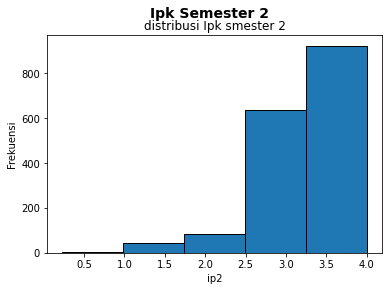

In [ ]:
plt.hist(df['ip2'], bins = 5, edgecolor = 'black')
plt.suptitle('Ipk Semester 2', fontsize=14, fontweight='bold')
plt.title('distribusi Ipk smester 2')
plt.xlabel('ip2')
plt.ylabel('Frekuensi')
plt.show()

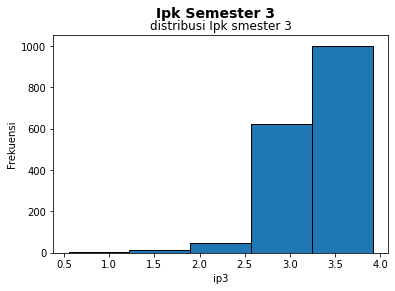

In [ ]:
plt.hist(df['ip3'], bins = 5, edgecolor = 'black')
plt.suptitle('Ipk Semester 3', fontsize=14, fontweight='bold')
plt.title('distribusi Ipk smester 3')
plt.xlabel('ip3')
plt.ylabel('Frekuensi')
plt.show()

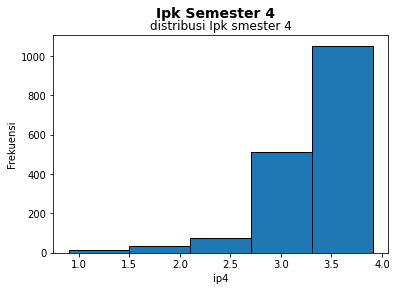

In [ ]:
plt.hist(df['ip4'], bins = 5, edgecolor = 'black')
plt.suptitle('Ipk Semester 4', fontsize=14, fontweight='bold')
plt.title('distribusi Ipk smester 4')
plt.xlabel('ip4')
plt.ylabel('Frekuensi')
plt.show()

dari histogram di atas rata-rata mahasiswa memiliki ipk 3,5 sampai 4.0

- **Mengelompokkan variabel**

In [ ]:
test= df.groupby(['tepat'])
test.describe()

ip1                                   ...   ip4                         
        count      mean       std   min    25%  ...   min   25%    50%   75%   max
tepat                                           ...                               
Tidak   135.0  2.964148  0.399031  1.45  2.805  ...  1.31  2.93  3.170  3.34  3.72
Ya     1552.0  3.192751  0.336931  0.83  3.050  ...  0.90  3.20  3.405  3.53  3.91

[2 rows x 32 columns]



> **Evaluasi Model**

- **Corellation Mapping**

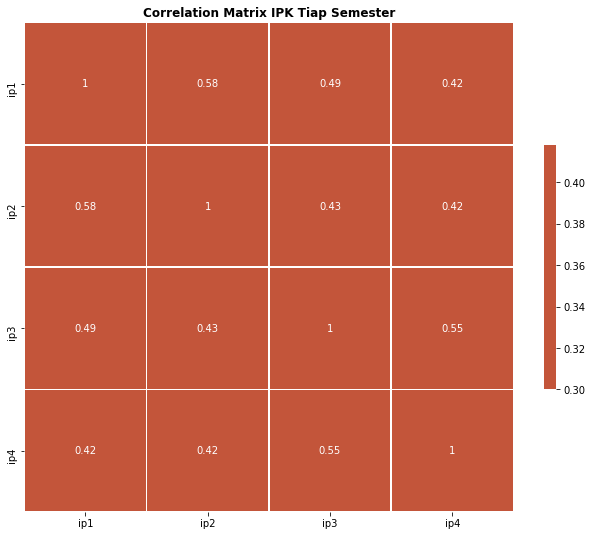

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df.corr(),annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix IPK Tiap Semester",fontweight="bold")
plt.show()

**Analisis** :

> Pada heatmap korelasi di atas, dapat disimpulkan dengan kemungkinan bahwa :

1.   Warna yang terang menunjukkan nilai atau skor yang baik pada semua IPK
2.   Jika mahasiswa memiliki IPK yang baik pada semester 1, maka mereka dapat meningkatkan ipk semester selanjutnya juga.



- **IPK tertinggi & Terrendah pada semester 4**

In [ ]:
df[df.ip4 == max(df.ip4)]

,ip1,ip2,ip3,ip4,tepat
1141,3.52,3.76,3.78,3.91,Ya


In [ ]:
df[df.ip4 == min(df.ip4)]

,ip1,ip2,ip3,ip4,tepat
458,3.0,3.14,2.08,0.9,Ya


- **IPK tertinggi & Terrendah  pada semester 3**

In [ ]:
df[df.ip3 == max(df.ip3)]

,ip1,ip2,ip3,ip4,tepat
1530,3.7,3.85,3.92,3.59,Ya


In [ ]:
df[df.ip3 == min(df.ip3)]

,ip1,ip2,ip3,ip4,tepat
210,3.06,2.61,0.55,1.46,Ya


- **IPK tertinggi & Terrendah  pada semester 2**

In [ ]:
df[df.ip2 == max(df.ip2)]

,ip1,ip2,ip3,ip4,tepat
511,3.08,4.0,2.71,3.27,Ya


In [ ]:
df[df.ip2 == min(df.ip2)]

,ip1,ip2,ip3,ip4,tepat
201,2.75,0.23,1.25,1.56,Ya


- **IPK tertinggi & Terrendah  pada semester 1**

In [ ]:
df[df.ip1 == max(df.ip1)]

,ip1,ip2,ip3,ip4,tepat
673,3.86,3.64,3.49,3.45,Tidak


In [ ]:
df[df.ip1 == min(df.ip1)]

,ip1,ip2,ip3,ip4,tepat
450,0.83,3.75,3.18,3.38,Ya


> **Membuat K-Means Clustering**

- **Visualisasi Data**

Visualisasikan data yang ada dengan plot poin-poin dan periksa apakah kita dapat melihat kelompok manapun, sehingga didapatkan hasil visualisasi data seperti gambar berikut.

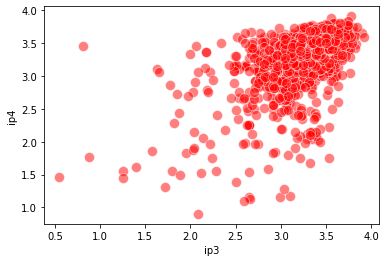

In [ ]:
sns.scatterplot(x="ip3", y="ip4", data=df, s=100, color="red" , alpha = 0.5)

- **Buat Clusters**

Menentukan variabel yang akan dikelompokkan. Disini variabel yang akan dikelompokkan adalah variabel ip1,ip2,ip3 dan ip4.

In [ ]:
df_x = df.iloc[:, 0:4]
df_x.head()

,ip1,ip2,ip3,ip4
0,2.30,1.97,1.80,1.56
1,1.81,1.68,1.57,1.86
2,3.07,3.00,2.75,3.21
3,2.71,2.33,2.61,1.98
4,3.17,3.02,3.28,2.96


Mengubah variabel data frame menjadi array sebelum menentukan nilai K.

In [ ]:
x_array = np.array(df_x)
print(x_array)

[[2.3  1.97 1.8  1.56]
 [1.81 1.68 1.57 1.86]
 [3.07 3.   2.75 3.21]
 ...
 [3.31 3.25 3.44 3.52]
 [3.44 3.35 3.5  3.5 ]
 [3.18 3.05 3.05 3.27]]


Menstandarkan kembali ukuran variabel array.

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.48514851, 0.46153846, 0.37091988, 0.2192691 ],
       [0.32343234, 0.38461538, 0.30267062, 0.31893688],
       [0.73927393, 0.73474801, 0.65281899, 0.76744186],
       ...,
       [0.81848185, 0.80106101, 0.85756677, 0.87043189],
       [0.86138614, 0.82758621, 0.87537092, 0.86378738],
       [0.77557756, 0.74801061, 0.74183976, 0.78737542]])

Menentukan dan konfigurasi fungsi k-means. syntax berikut merupakan syntax untuk mengelompokkan data menjadi 4 cluster.
menentukan nilai K (cluster) dari data.

In [ ]:
# Menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters = 4, random_state=123)
# Menentukan kluster dari data
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

Menampilkan pusat cluster. Untuk melihat pusat cluster.

In [ ]:
print(kmeans.cluster_centers_)

[[0.73561017 0.76739532 0.76912445 0.77881763]
 [0.52867404 0.45139647 0.75224297 0.76638655]
 [0.84845373 0.84630121 0.85899183 0.86092449]
 [0.65665567 0.63563218 0.6251731  0.42840532]]


Menambahkan kolom cluster dalam data frame df.

In [ ]:
# Menampilkan hasil kluster
print(kmeans.labels_)
# Menambahkan kolom "kluster" dalam data frame ritel
df["kluster"] = kmeans.labels_
df.head()

[3 3 0 ... 2 2 0]


,ip1,ip2,ip3,ip4,tepat,kluster
0,2.30,1.97,1.80,1.56,Tidak,3
1,1.81,1.68,1.57,1.86,Tidak,3
2,3.07,3.00,2.75,3.21,Tidak,0
3,2.71,2.33,2.61,1.98,Tidak,3
4,3.17,3.02,3.28,2.96,Tidak,0


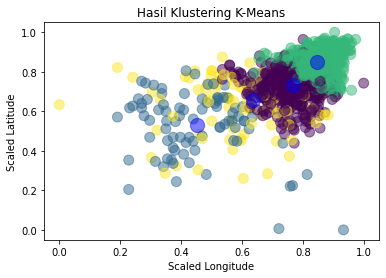

In [ ]:
fig, ax = plt.subplots()
sct = ax.scatter(x_scaled[:,1], x_scaled[:,0], s = 100,
c = df.kluster, marker = "o", alpha = 0.5)
centers = kmeans.cluster_centers_
ax.scatter(centers[:,1], centers[:,0], c='blue', s=200, alpha=0.5);plt.title("Hasil Klustering K-Means")
plt.xlabel("Scaled Longitude")
plt.ylabel("Scaled Latitude")
plt.show()

Data kelulusan tepat waktu telah berhasil kita klasterkan menjadi 4 klaster!

# **Evaluasi Data**

---



Untuk evaluasi, /kita akan menggunakan **analisis regresi** untuk memprediksi IPK3 menggunakan variabel IPK

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
url = 'https://raw.githubusercontent.com/Mifta-ux/Tugas-Pengantar-Data-Saintis/main/data_lulus_tepat_waktu.csv'
df = pd.read_csv("https://raw.githubusercontent.com/Mifta-ux/Tugas-Pengantar-Data-Saintis/main/data_lulus_tepat_waktu.csv") 
df.head()

,ip1,ip2,ip3,ip4,tepat
0,2.30,1.97,1.80,1.56,Tidak
1,1.81,1.68,1.57,1.86,Tidak
2,3.07,3.00,2.75,3.21,Tidak
3,2.71,2.33,2.61,1.98,Tidak
4,3.17,3.02,3.28,2.96,Tidak


Pada data permodelan korelasi IPK semester 3 dan IPK semester 4 memiliki nilai korelasi yang kuat yaitu lebih dari 0,9 dengan menggunakan perhitungan pearson. Korelasi antara reading score dan writing score juga linear.

Pada uji regresi kali ini ditetapkan hipotesis null nya adalah korelasi kuat lebih dari 0,9 yang terjadi dengan kebetulan.

> Jika p value pada hipotesis null berubah menjadi lebih kecil maka hipotesis ditolak.

> Langkah selanjutnya bertujuan untuk mengetahui apakah hipotesis ditolak atau diterima dengan mengetahui hasil signifikasnsinya.





In [ ]:
class HypothesisTest(object):
    
    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)
        
    def PValue(self, iters = 1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) for _ in range(iters)]
        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters
    
    def TestStatistic(self, data):
        raise UnimplementedMethodException()
        
    def MakeModel(self):
        pass
    
    def RunModel(self):
        raise UnimplementedMethodException()

In [ ]:
class CorrPermute(HypothesisTest):
    
    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(correlation(xs, ys))
        return test_stat
    
    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys
    
def correlation(x, y):
    std_x = np.std(x)
    std_y = np.std(y)
    if std_x and std_y > 0:
        return covariance(x, y) / std_x / std_y
    else:
        return 0
    
def de_mean(x):
    x_bar = np.mean(x)
    return [x_i - x_bar for x_i in x]

def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n - 1)

In [ ]:
rs = df['ip3']
ws = df['ip4']

ct = CorrPermute((rs, ws))
pvalue = ct.PValue()

In [ ]:
print('The P-Value is: ', pvalue)

The P-Value is:  0.0


**Analisis** :

*   Nilai P-Value pada hipotesis null di atas adalah 0.
*   Hipotesis null adalah salah, dan korelasi kuat yaitu 0,9 antara skor reading dan writing tidak terjadi secara kebetulan. Dapat disimpulkan bahwa korelasi yang terjadi adalah signifikan secara statistik.



**Memprediksi IPK semester 3 dengan atau tanpa IPK semseter 4**

Penggunaan Linear least square :

*    Linear least score digunakan untuk mengetahui korelasi dalam mengukur kekuatan dan tanda suatu hubungan antar variabel.
*   Linear least square digunakan untuk meminimalkan MSE (mean squared error).

Kali ini, untuk mendapatkan garis kemiringan dan intersep menggunakan linear least square untuk memprediksi skor reading.

In [ ]:
def LeastSquares(xs, ys):
    meanx, varx = np.mean(xs), np.var(xs)
    meany = np.mean(ys)
    
    slope = covariance(xs, ys) / varx
    inter = meany - slope * meanx
    
    return inter, slope

def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    
    return fit_xs, fit_ys

In [ ]:
inter, slope = LeastSquares(ws, rs)
fit_xs, fit_ys = FitLine(ws, inter, slope)

print('intercept is: {} and slope is: {}'.format(inter, slope))

intercept is: 1.7078942710872669 and slope is: 0.4692931259077411


Pada linear least skor di atas, didapatkan hasil intersepnya adalah lebih dari 1,70 dan slope-nya adalah lebih dari 0,4

**Residual** :

In [ ]:
def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

In [ ]:
res = Residuals(ws, rs, inter, slope)

df['residuals'] = res

**Memprediksi IPK semester 3 dengan atau tanpa IPK semseter 4 :**

In [ ]:
print('RMSE if we predict the reading scores using the writing scores: ', np.std(res))
print('RMSE if we predict the reading scores without using the writing scores: ', np.std(rs))

RMSE if we predict the reading scores using the writing scores:  0.2832421405711723
RMSE if we predict the reading scores without using the writing scores:  0.33940584069287644


Dari data di atas, dapat diinterpretasikan sebagai berikut :

*   Nilai RMSE (Root Mean Square Error) lebih dari 4 jika menggunakan IPK semseter 4 untuk memprediksi nilai dari IPK Semester 3.
*   Nilai RMSE (Root Mean Square Error) lebih dari 14 jika tidak menggunakan IPK semseter 4 untuk memprediksi nilai dari IPK Semester 3.

> Sehingga dari RMSE di atas, dapat disimpulkan bahwa lebih baik menggunakan IPK semseter 4 untuk memprediksi nilai dari IPK Semester 3.

**Koefisien Determinasi**:

> Koefisien determinasi merupakan metric yang digunakan untuk mendeterminasikan seberapa baik model kita




In [ ]:
r_squared = 1 - (np.var(res) / np.var(rs))

print('The Coefficient of Determination or r^2 is: ', r_squared)

The Coefficient of Determination or r^2 is:  0.3035705747839691


Dari data di atas, nilai dari R^2 lebih dari 0,3, sehingga garis yang dihasilkan cocok untuk data ini sehingga garis ini dapat digunakan untuk memprediksi IPK Semester 3.

**Visualisasi Plotting Garis/Line :**

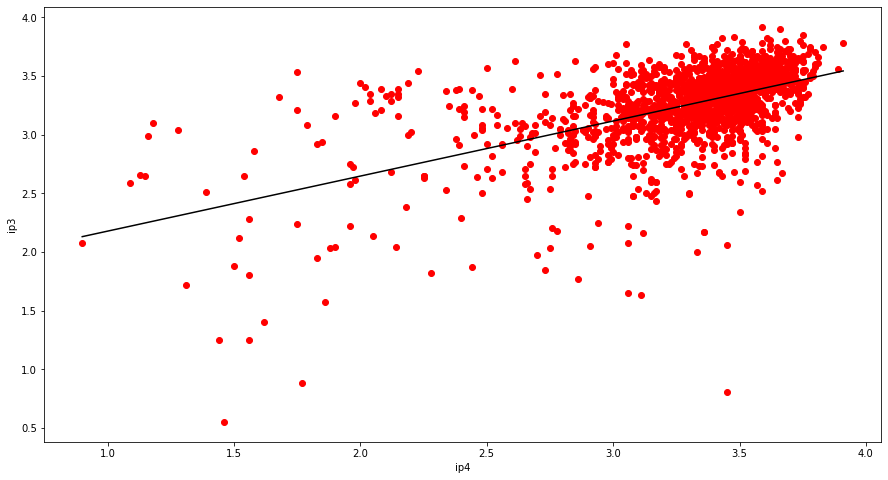

In [ ]:
plt.figure(figsize = (15, 8))

plt.xlabel('ip4')
plt.ylabel('ip3')

plt.plot(fit_xs, fit_ys, color = 'black')
plt.scatter(ws, rs, color = 'red')

Gambar visualisasi di atas, menunjukkan bahwa garis yang dihasilkan cocok dengan diagram pada visualisasi data sebelumnya.

> **Klasifikasi dengan Random Forest**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [ ]:
url = 'https://raw.githubusercontent.com/Mifta-ux/Tugas-Pengantar-Data-Saintis/main/data_lulus_tepat_waktu.csv'
dataset = pd.read_csv("https://raw.githubusercontent.com/Mifta-ux/Tugas-Pengantar-Data-Saintis/main/data_lulus_tepat_waktu.csv") 
dataset.head()

,ip1,ip2,ip3,ip4,tepat
0,2.30,1.97,1.80,1.56,Tidak
1,1.81,1.68,1.57,1.86,Tidak
2,3.07,3.00,2.75,3.21,Tidak
3,2.71,2.33,2.61,1.98,Tidak
4,3.17,3.02,3.28,2.96,Tidak


In [ ]:
dataset.shape

(1687, 5)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ip1     1687 non-null   float64
 1   ip2     1687 non-null   float64
 2   ip3     1687 non-null   float64
 3   ip4     1687 non-null   float64
 4   tepat   1687 non-null   object 
dtypes: float64(4), object(1)
memory usage: 66.0+ KB


In [ ]:
dataset.isnull().values.any()

False

In [ ]:
ket = {"Ya" : 0, "Tidak" : 1}
dataset["tepat"] = dataset["tepat"].map(ket)

In [ ]:
dataset['tepat'].value_counts()

0    1552
1     135
Name: tepat, dtype: int64

In [ ]:
print('Ya', round(dataset['tepat'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Tidak', round(dataset['tepat'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

Ya 92.0 % of the dataset
Tidak 8.0 % of the dataset


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: YA || 1: Tidak)')

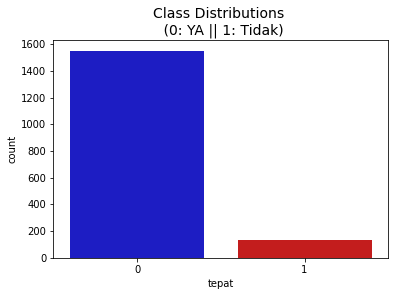

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#0101DF", "#DF0101"]

sns.countplot('tepat', data=dataset, palette=colors)
plt.title('Class Distributions \n (0: YA || 1: Tidak)', fontsize=14)

Data dari diagram diatas tidak seimbang

Kita melakukan resampling datanya. Resampling ada 2 :

Random Oversampling: Randomly duplicate examples in the minority class.
Random Undersampling: Randomly delete examples in the majority class.
disini kita menggunakan random over sampling

In [ ]:
# Class count
count_class_0, count_class_1 = dataset.tepat.value_counts()

# Divide by class
df_class_0 = dataset[dataset['tepat'] == 0]
df_class_1 = dataset[dataset['tepat'] == 1]

Random over-sampling:
1    1552
0    1552
Name: tepat, dtype: int64


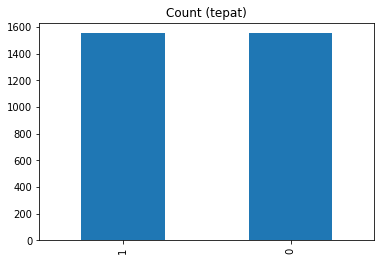

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.tepat.value_counts())

df_test_over.tepat.value_counts().plot(kind='bar', title='Count (tepat)');

In [ ]:
df_test_over.tepat.value_counts()

1    1552
0    1552
Name: tepat, dtype: int64

Data dari diagram diatas sudah seimbang , kita bisa melanjutkan ke proses selanjutnya.

In [ ]:
x = df_test_over.iloc[:, :-1].values
y = df_test_over.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split

validation_size = 0.20
num_trees = 100
seed = 5
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=validation_size, random_state=seed)

In [ ]:
#Check Algorithms
models = []
models.append(( 'LR' , LogisticRegression()))
models.append(( 'LDA' , LinearDiscriminantAnalysis()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
# evaluate each model
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=2, random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring= 'accuracy' )
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

LR: 0.641162 (0.005897)
LDA: 0.635117 (0.004980)
KNN: 0.810711 (0.004909)
CART: 0.928715 (0.001237)
NB: 0.613771 (0.006197)
RF: 0.953282 (0.001630)


RF paling besar 94%

In [ ]:
rf = RandomForestClassifier(n_estimators=num_trees, random_state=seed)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9774557165861514
[[295  14]
 [  0 312]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       309
           1       0.96      1.00      0.98       312

    accuracy                           0.98       621
   macro avg       0.98      0.98      0.98       621
weighted avg       0.98      0.98      0.98       621



Melakukan Test

In [ ]:
# ip1 = 3.17
# ip2 = 3.02
# ip3 = 3.28
# ip4 = 2.96

prediction_rf=rf.predict([[3.17,3.02,3.28,2.96]])
score1 = rf.score(x_test, y_test)
if prediction_rf[0] == 0:
    pred = "Tepat Waktu"
else:
    pred = "Tidak Tepat Waktu"
print('Prediksi :',pred)
print("Test score: {0:.2f} %".format(100 * score1)) 

Prediksi : Tidak Tepat Waktu
Test score: 97.75 %


In [ ]:
prediction_rf=rf.predict([[3.07,3.04,3.39,3.55]])
score1 = rf.score(x_test, y_test)
if prediction_rf[0] == 0:
    pred = "Tepat Waktu"
else:
    pred = "Tidak Tepat Waktu"
print('Prediksi :',pred)
print("Test score: {0:.2f} %".format(100 * score1)) 

Prediksi : Tepat Waktu
Test score: 97.75 %
